# 1. Librerias

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Informacion de los datos

In [14]:
data = "customer_churn_dataset.csv"

df = pd.read_csv(data)
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


* **CustomerID:** Código de identificación del cliente
* **Age:** Edad del cliente (en años)
* **Gender:** Género del cliente (Masculino/Femenino)
* **Tenure:** El período de tiempo que el cliente utiliza el servicio (en meses)
* **Usage Frequency:** La frecuencia con la que el cliente utiliza el servicio (en meses)
* **Support Calls:** Frecuencia de llamadas del cliente al servicio de atención
* **Payment Delay:** El período de retraso en el pago de las facturas del servicio por parte de los clientes (en meses)
* **Subscription Type:** El tipo de servicio seleccionado por el cliente (Básico/Estándar/Premium)
* **Contract Length:** El período de contrato del servicio seleccionado por el cliente (Mensual/Trimestral/Anual)
* **Total Spend:** Dinero total gastado por el cliente en el servicio (en USD)
* **Last Interaction:** El período de tiempo desde el último uso del cliente hasta el presente (en meses)
* **Churn:** El estado actual del cliente, continúa con el servicio (0) o lo abandona (1)

# 3. Preprocesamiento de datos

In [15]:
df.shape

(64374, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [17]:
# Verificar si hay duplicados
df.duplicated().sum()

np.int64(0)

In [18]:
# Verificar si hay datos faltantes
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [19]:
# Eliminando la columna CustomerID ya que no es necesaria para el modelado.
df = df.drop(columns= ['CustomerID'])
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                64374 non-null  int64 
 1   Gender             64374 non-null  object
 2   Tenure             64374 non-null  int64 
 3   Usage Frequency    64374 non-null  int64 
 4   Support Calls      64374 non-null  int64 
 5   Payment Delay      64374 non-null  int64 
 6   Subscription Type  64374 non-null  object
 7   Contract Length    64374 non-null  object
 8   Total Spend        64374 non-null  int64 
 9   Last Interaction   64374 non-null  int64 
 10  Churn              64374 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 5.4+ MB


In [21]:
# Lista de las columnas
df.columns.tolist()

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [22]:
# Imprimiendo los valores únicos en todas las columnas menos las numericas.

caracteristicas_numericas = ['Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction']

for col in df.columns:
    if col not in caracteristicas_numericas:
        print(col, df[col].unique())
        print("-" * 100)

Gender ['Female' 'Male']
----------------------------------------------------------------------------------------------------
Subscription Type ['Basic' 'Standard' 'Premium']
----------------------------------------------------------------------------------------------------
Contract Length ['Monthly' 'Annual' 'Quarterly']
----------------------------------------------------------------------------------------------------
Churn [1 0]
----------------------------------------------------------------------------------------------------


# 4. EDA (Análisis Exploratorio de Datos)

In [23]:
# Informacion de los datos numericos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,64374.0,41.970982,13.924911,18.0,30.0,42.0,54.0,65.0
Tenure,64374.0,31.994827,17.098234,1.0,18.0,33.0,47.0,60.0
Usage Frequency,64374.0,15.080234,8.816470,1.0,7.0,15.0,23.0,30.0
Support Calls,64374.0,5.400690,3.114005,0.0,3.0,6.0,8.0,10.0
Payment Delay,64374.0,17.133952,8.852211,0.0,10.0,19.0,25.0,30.0
Total Spend,64374.0,541.023379,260.874809,100.0,313.0,534.0,768.0,1000.0
Last Interaction,64374.0,15.498850,8.638436,1.0,8.0,15.0,23.0,30.0
Churn,64374.0,0.473685,0.499311,0.0,0.0,0.0,1.0,1.0


In [24]:
# Inforamcion de los objetos en los datos
df.describe(include= 'object').T

,count,unique,top,freq
Gender,64374,2,Female,34353
Subscription Type,64374,3,Standard,21502
Contract Length,64374,3,Monthly,22130


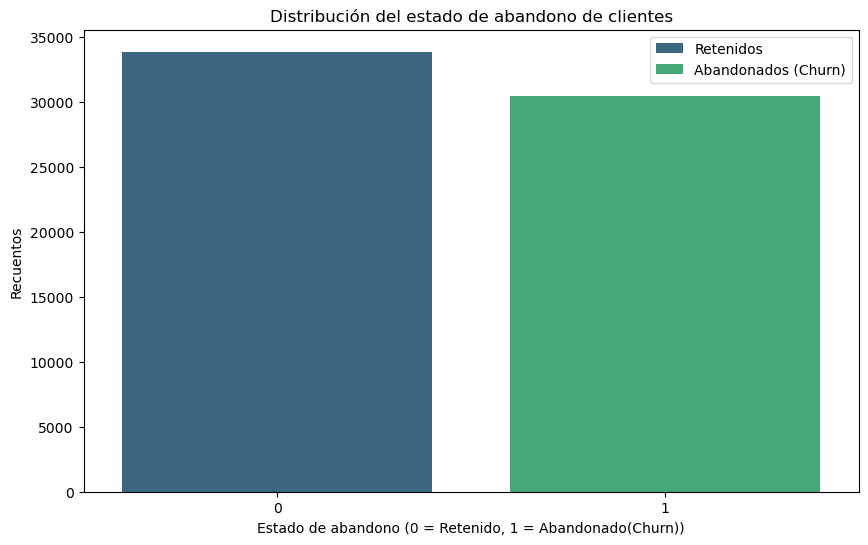

In [12]:
# Información del estado actual del cliente
plt.figure(figsize= (10, 6))
sns.countplot(data= df, x= 'Churn', hue= 'Churn',palette= 'viridis')
plt.title('Distribución del estado de abandono de clientes')
plt.xlabel('Estado de abandono (0 = Retenido, 1 = Abandonado(Churn))')
plt.ylabel('Recuentos')
plt.legend(['Retenidos', 'Abandonados (Churn)']);

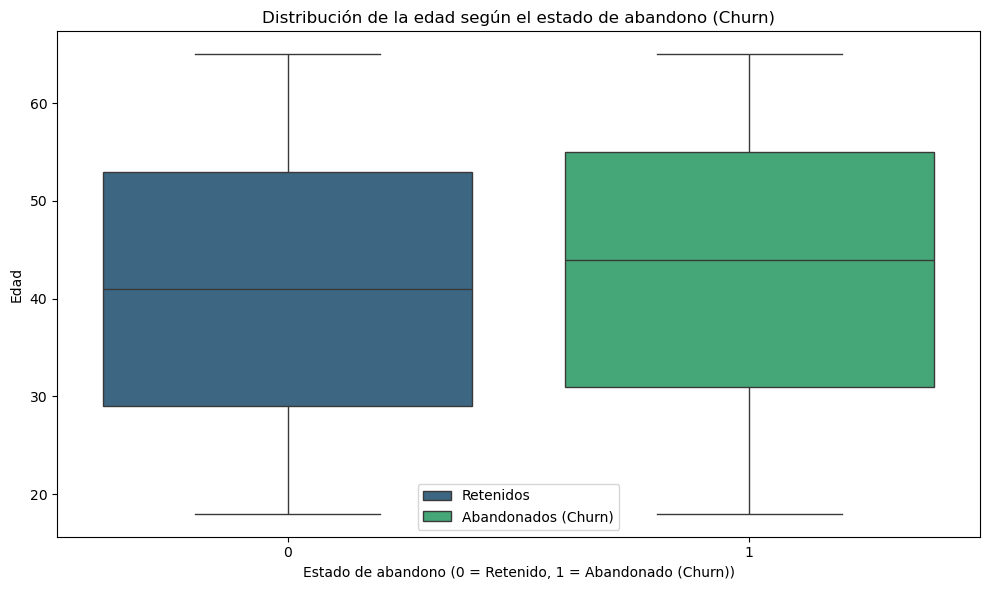

In [25]:
plt.figure(figsize= (10, 6))
sns.boxplot(data= df, x= 'Churn', y= 'Age', hue= 'Churn', palette= 'viridis')
plt.title('Distribución de la edad según el estado de abandono (Churn)')
plt.xlabel('Estado de abandono (0 = Retenido, 1 = Abandonado (Churn))')
plt.ylabel('Edad')
plt.legend(['Retenidos', 'Abandonados (Churn)']);
plt.tight_layout();

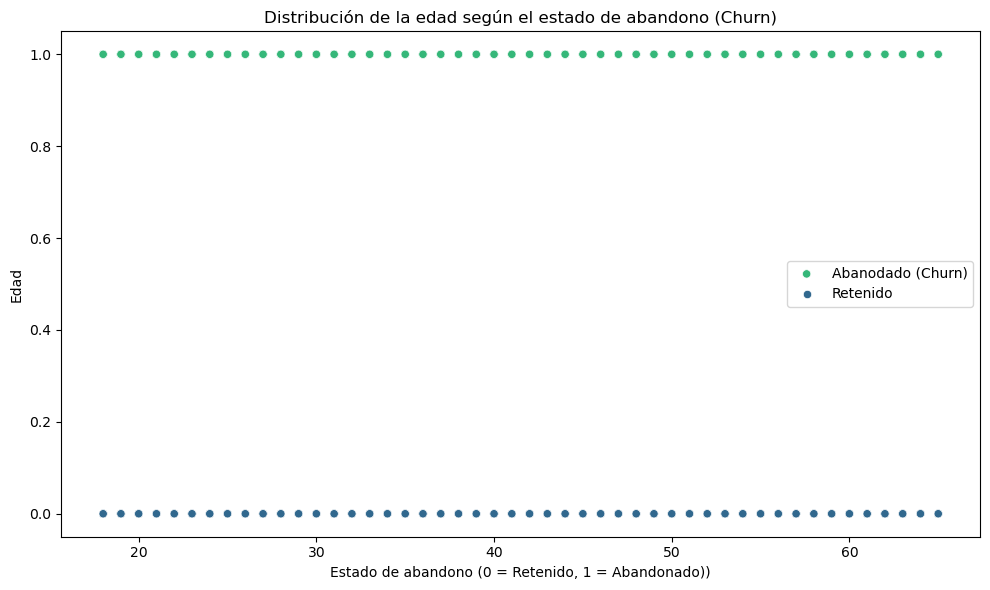

In [26]:
plt.figure(figsize= (10, 6))
sns.scatterplot(data= df, x= 'Age', y= 'Churn', hue= 'Churn', palette= 'viridis')
plt.title('Distribución de la edad según el estado de abandono (Churn)')
plt.xlabel('Estado de abandono (0 = Retenido, 1 = Abandonado))')
plt.ylabel('Edad')
plt.legend(labels= ['Abanodado (Churn)', 'Retenido'])
plt.tight_layout();

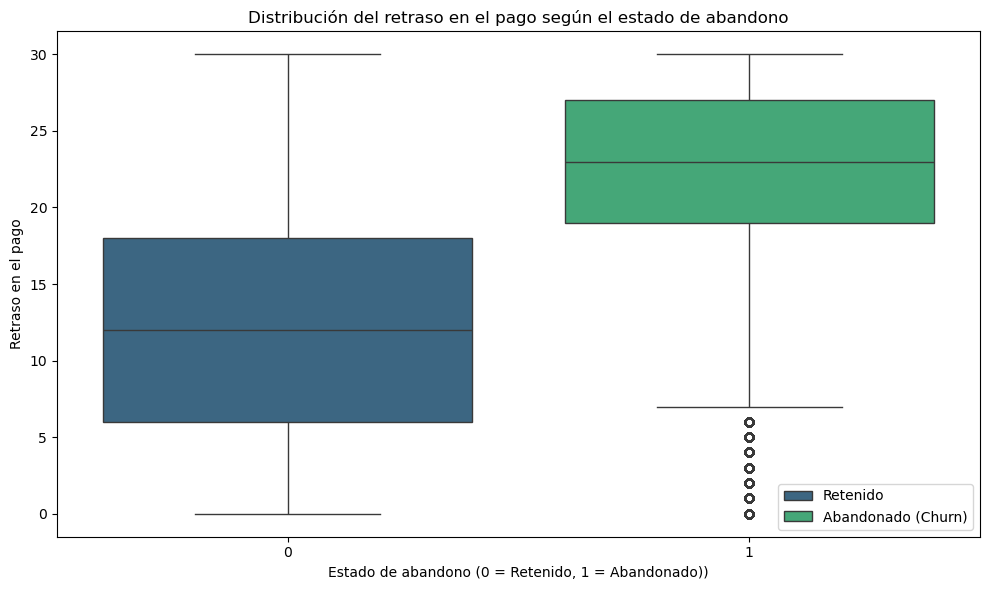

In [27]:
plt.figure(figsize= (10, 6))
sns.boxplot(data= df, x= 'Churn', y= 'Payment Delay', hue= 'Churn', palette= 'viridis')
plt.title('Distribución del retraso en el pago según el estado de abandono')
plt.xlabel('Estado de abandono (0 = Retenido, 1 = Abandonado))')
plt.ylabel('Retraso en el pago')
plt.legend(labels= ['Retenido', 'Abandonado (Churn)'])
plt.tight_layout();

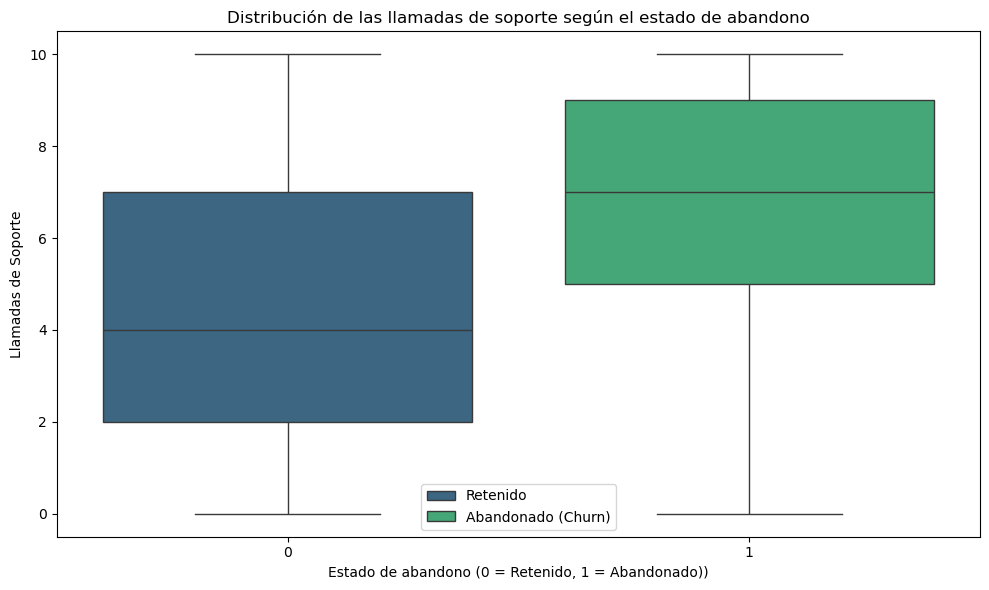

In [28]:
plt.figure(figsize= (10, 6))
sns.boxplot(data= df, x= 'Churn', y= 'Support Calls', hue= 'Churn', palette= 'viridis')
plt.title('Distribución de las llamadas de soporte según el estado de abandono')
plt.xlabel('Estado de abandono (0 = Retenido, 1 = Abandonado))')
plt.ylabel('Llamadas de Soporte')
plt.legend(labels= ['Retenido', 'Abandonado (Churn)'])
plt.tight_layout();

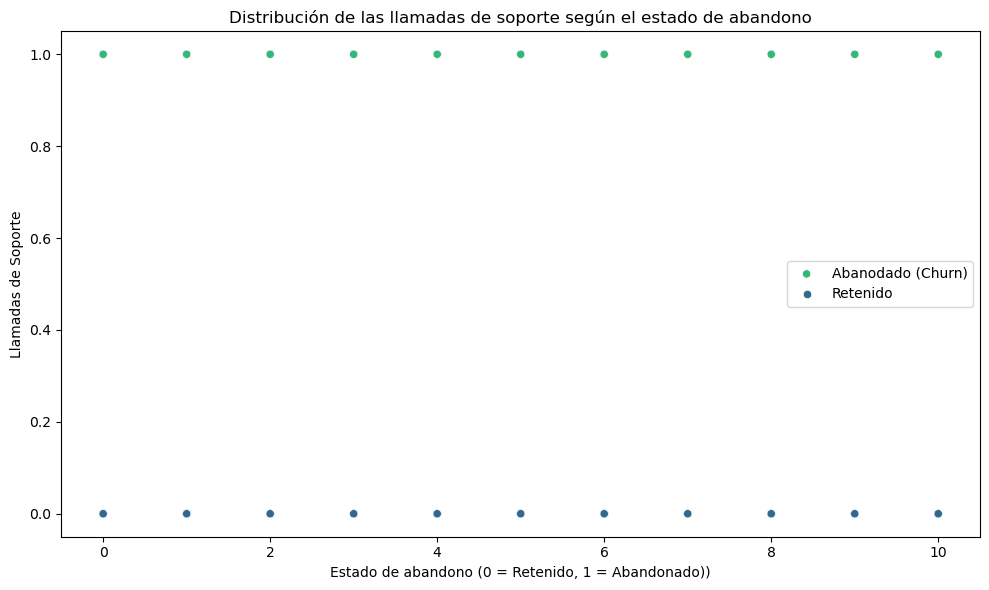

In [29]:
plt.figure(figsize= (10, 6))
sns.scatterplot(data= df, x= 'Support Calls', y= 'Churn', hue= 'Churn', palette= 'viridis')
plt.title('Distribución de las llamadas de soporte según el estado de abandono')
plt.xlabel('Estado de abandono (0 = Retenido, 1 = Abandonado))')
plt.ylabel('Llamadas de Soporte')
plt.legend(labels= ['Abanodado (Churn)', 'Retenido'])
plt.tight_layout();

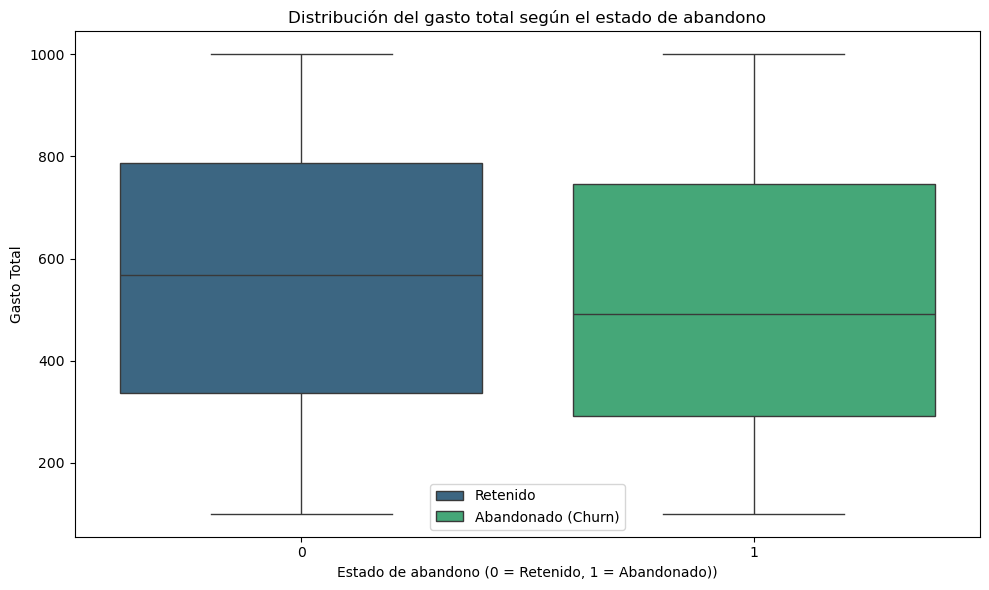

In [30]:
plt.figure(figsize= (10, 6))
sns.boxplot(data= df, x= 'Churn', y= 'Total Spend', hue= 'Churn', palette= 'viridis')
plt.title('Distribución del gasto total según el estado de abandono')
plt.xlabel('Estado de abandono (0 = Retenido, 1 = Abandonado))')
plt.ylabel('Gasto Total')
plt.legend(labels= ['Retenido', 'Abandonado (Churn)'])
plt.tight_layout();

El resultado muestra que tenemos un 52.6% de clientes que permanecen y un 47.4% que se van.

### Tipos de contratos y permanencia

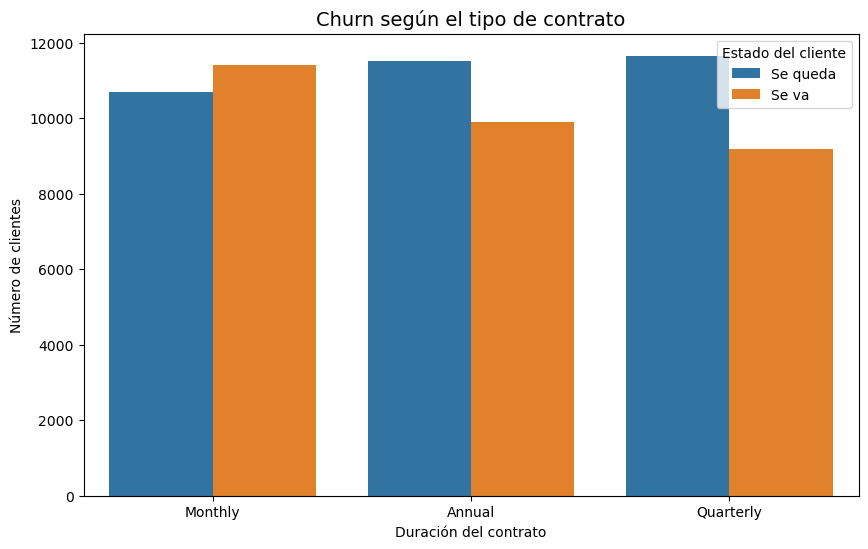

In [10]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Contract Length',hue='Churn',data=df)

# Títulos y etiquetas
ax.set_title('Churn según el tipo de contrato', fontsize=14)
ax.set_xlabel('Duración del contrato')
ax.set_ylabel('Número de clientes')

# Personalizar la leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    ['Se queda', 'Se va'],
    title='Estado del cliente'
)

plt.show()


Como se observa en la gráfica, los contratos Mensuales (Monthly) tienen una proporción de fuga mucho mayor que los Anuales o Trimestrales. De hecho, en el contrato mensual, hay más personas que se van a las que permanecen